In [141]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar

In [142]:
df_env = pd.read_csv("C:/Users/nhatp/PycharmProjects/TAMUDatathon/env_data.csv", parse_dates=True)

In [104]:
df_env.head(3)

,Unnamed: 0,Country,Country Name,Country RegionId,Stations,Stations Name,Stations Latitude,Stations Longitude,Stations USAF,Stations WBAN,Stations Country Code,Indicator,Indicator Name,Measure,Measure Name,Units,Scale,Frequency,Date,Value
0,0,US,United States,US,725030-14732,LA GUARDIA AIRPORT,40.779,-73.880,725030,14732,US,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,1,D,4/3/2021,40.6
1,1,US,United States,US,997280-99999,KINGS POINT,40.800,-73.770,997280,99999,US,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,1,D,4/3/2021,38.8
2,2,US,United States,US,997272-99999,BERGEN POINT,40.639,-74.146,997272,99999,US,KN.A7,Mean temperature (Fahrenheit),M2,Number of observations,Number,1,D,4/3/2021,24.0


In [143]:
len(df_env)

121347

In [106]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121347 entries, 0 to 121346
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             121347 non-null  int64  
 1   Country                121347 non-null  object 
 2   Country Name           121347 non-null  object 
 3   Country RegionId       121347 non-null  object 
 4   Stations               121347 non-null  object 
 5   Stations Name          121347 non-null  object 
 6   Stations Latitude      121347 non-null  float64
 7   Stations Longitude     121347 non-null  float64
 8   Stations USAF          121347 non-null  int64  
 9   Stations WBAN          121347 non-null  int64  
 10  Stations Country Code  121347 non-null  object 
 11  Indicator              121347 non-null  object 
 12  Indicator Name         121347 non-null  object 
 13  Measure                121347 non-null  object 
 14  Measure Name           121347 non-nu

In [144]:
df_env.drop(['Country', 'Country Name', 'Country RegionId', 'Stations Country Code', 'Frequency','Unnamed: 0', 'Scale', 'Stations USAF', 'Stations WBAN'], axis=1, inplace=True)

In [109]:
df_env.head(10)

,Stations,Stations Name,Stations Latitude,Stations Longitude,Indicator,Indicator Name,Measure,Measure Name,Units,Date,Value
0,725030-14732,LA GUARDIA AIRPORT,40.779,-73.880,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,4/3/2021,40.6
1,997280-99999,KINGS POINT,40.800,-73.770,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,4/3/2021,38.8
2,997272-99999,BERGEN POINT,40.639,-74.146,KN.A7,Mean temperature (Fahrenheit),M2,Number of observations,Number,4/3/2021,24.0
3,724094-54743,ESSEX COUNTY AIRPORT,40.876,-74.283,KN.A7,Mean temperature (Fahrenheit),M2,Number of observations,Number,4/3/2021,24.0
4,724094-54743,ESSEX COUNTY AIRPORT,40.876,-74.283,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,4/3/2021,40.0
5,997290-99999,BRIDGEPORT,41.170,-73.180,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,4/3/2021,37.8
6,725038-14714,STEWART INTERNATIONAL AIRPORT,41.500,-74.100,KN.A7,Mean temperature (Fahrenheit),M1,Value,Fahrenheit,4/3/2021,35.9
7,725038-14714,STEWART INTERNATIONAL AIRPORT,41.500,-74.100,KN.A7,Mean temperature (Fahrenheit),M2,Number of observations,Number,4/3/2021,24.0
8,997290-99999,BRIDGEPORT,41.170,-73.180,KN.A7,Mean temperature (Fahrenheit),M2,Number of observations,Number,4/3/2021,24.0
9,724077-54779,AEROFLEX-ANDOVER AIRPORT,41.009,-74.736,KN.A7,Mean temperature (Fahrenheit),M2,Number of observations,Number,4/3/2021,24.0


In [110]:
df_env['Measure Name'].unique()

array(['Value', 'Number of observations'], dtype=object)

In [145]:
# Measure name = Value
df_env = df_env[df_env['Measure Name'] == 'Value']
  
df_env.drop(['Measure Name', 'Measure'], axis=1, inplace=True)


In [113]:
df_env.head(5)

,Stations,Stations Name,Stations Latitude,Stations Longitude,Indicator,Indicator Name,Units,Date,Value
0,725030-14732,LA GUARDIA AIRPORT,40.779,-73.880,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,40.6
1,997280-99999,KINGS POINT,40.800,-73.770,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,38.8
4,724094-54743,ESSEX COUNTY AIRPORT,40.876,-74.283,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,40.0
5,997290-99999,BRIDGEPORT,41.170,-73.180,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,37.8
6,725038-14714,STEWART INTERNATIONAL AIRPORT,41.500,-74.100,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,35.9


In [146]:
df_env1 = df_env.drop(['Stations', 'Stations Latitude', 'Stations Longitude'], axis=1)

In [147]:
df_env1.head(5)

,Stations Name,Indicator,Indicator Name,Units,Date,Value
0,LA GUARDIA AIRPORT,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,40.6
1,KINGS POINT,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,38.8
4,ESSEX COUNTY AIRPORT,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,40.0
5,BRIDGEPORT,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,37.8
6,STEWART INTERNATIONAL AIRPORT,KN.A7,Mean temperature (Fahrenheit),Fahrenheit,4/3/2021,35.9


In [116]:
df_env1['Units'].unique()

array(['Fahrenheit', 'inches', nan], dtype=object)

In [117]:
df_env1.isna().sum()
df_env1.shape

(76827, 6)

In [148]:
df_env2 = df_env1.pivot_table(index=["Stations Name", "Date"], columns = 'Indicator Name', values='Value').reset_index()

In [120]:
df_env2.head(15)

Indicator Name,Stations Name,Date,Mean temperature (Fahrenheit),Precipitation amount (inches)
0,720581 - LINDEN AIRPORT,1/1/2018,11.4,0.00
1,720581 - LINDEN AIRPORT,1/1/2019,50.5,1.19
2,720581 - LINDEN AIRPORT,1/1/2020,39.1,NaN
3,720581 - LINDEN AIRPORT,1/10/2018,32.3,0.00
4,720581 - LINDEN AIRPORT,1/10/2019,33.3,0.00
5,720581 - LINDEN AIRPORT,1/10/2020,37.4,0.00
6,720581 - LINDEN AIRPORT,1/10/2021,34.9,0.00
7,720581 - LINDEN AIRPORT,1/11/2018,40.1,0.03
8,720581 - LINDEN AIRPORT,1/11/2019,28.2,0.00
9,720581 - LINDEN AIRPORT,1/11/2020,57.2,0.00


In [121]:
df_env2.shape

(44517, 4)

In [149]:
df_env3 =  df_env2.groupby('Date',as_index=False).agg({'Mean temperature (Fahrenheit)':'mean','Precipitation amount (inches)':'mean'})

In [150]:
df_env3

,Date,Mean temperature (Fahrenheit),Precipitation amount (inches)
0,1/1/2018,9.440000,0.000000
1,1/1/2019,48.126471,1.132400
2,1/1/2020,37.912121,0.012258
3,1/10/2018,29.560000,0.000571
4,1/10/2019,32.091176,0.051154
...,...,...,...
1372,9/8/2021,72.518182,0.430000
1373,9/9/2018,57.648148,0.067308
1374,9/9/2019,68.209091,NaN
1375,9/9/2020,71.938235,0.000000


In [151]:
df_env3 = df_env3.rename(columns={'Mean temperature (Fahrenheit)': 'mean_temp', 'Precipitation amount (inches)': 'mean_prec'})

In [152]:
df_env3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1377 non-null   object 
 1   mean_temp  1377 non-null   float64
 2   mean_prec  1292 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.0+ KB


In [153]:
df_env3['Date'] = pd.to_datetime(df_env3['Date'])

In [132]:
df_env3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1377 non-null   datetime64[ns]
 1   mean_temp  1377 non-null   float64       
 2   mean_prec  1292 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 43.0 KB


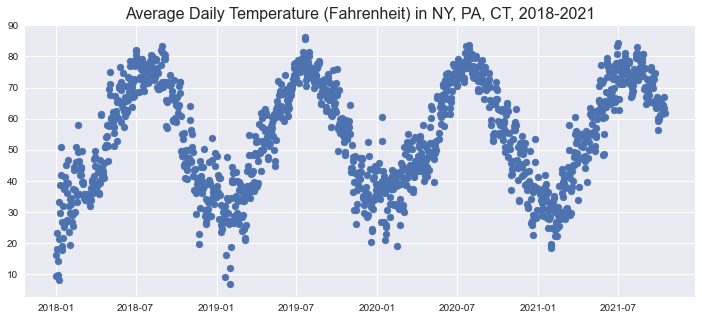

In [154]:
plt.scatter(df_env3["Date"], df_env3["mean_temp"])
plt.title('Average Daily Temperature (Fahrenheit) in NY, PA, CT, 2018-2021', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()

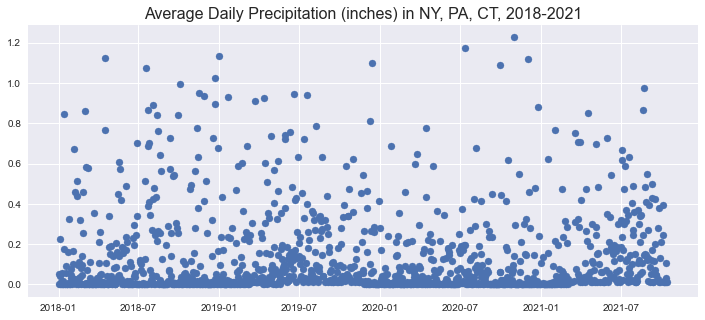

In [155]:
df_env3['mean_prec'] = df_env3['mean_prec'][df_env3['mean_prec'].between(df_env3['mean_prec'].quantile(.0), df_env3['mean_prec'].quantile(.99))] 
plt.scatter(df_env3["Date"], df_env3["mean_prec"], label="mean_prec")
#plt.ylim([0.0, 2])
plt.title('Average Daily Precipitation (inches) in NY, PA, CT, 2018-2021', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()